In [ ]:
import pandas as pd
df1=pd.read_csv('NO_file1.csv')
df2=pd.read_csv('NO_file2.csv')

In [ ]:
#Making it years campatible
df_2021=df1
df_2023=df2[0:5832]
df_2022=df2[5832:8760]
df_2022

,Unnamed: 0,values,date,month,year,hour
5832,5832,4312.0,1,9,2022,0
5833,5833,4356.0,1,9,2022,1
5834,5834,45600.0,1,9,2022,2
5835,5835,4464.0,1,9,2022,3
5836,5836,4572.0,1,9,2022,4
...,...,...,...,...,...,...
8755,8755,10180.0,31,12,2022,19
8756,8756,4484.0,31,12,2022,20
8757,8757,4356.0,31,12,2022,21
8758,8758,4384.0,31,12,2022,22


In [ ]:
#Extrapolating the 2022 using the 2023 and 2021
df_2022=df_2022.reset_index(drop=True)
df_2022

,Unnamed: 0,values,date,month,year,hour
0,5832,4312.0,1,9,2022,0
1,5833,4356.0,1,9,2022,1
2,5834,45600.0,1,9,2022,2
3,5835,4464.0,1,9,2022,3
4,5836,4572.0,1,9,2022,4
...,...,...,...,...,...,...
2923,8755,10180.0,31,12,2022,19
2924,8756,4484.0,31,12,2022,20
2925,8757,4356.0,31,12,2022,21
2926,8758,4384.0,31,12,2022,22


In [ ]:
new_rows_data=pd.DataFrame(columns=['hour','date','year','values'])
for i in range (0,5832):
  df_2022.loc[2928+i,'hour']=df_2023.iloc[i]['hour']
  df_2022.loc[2928+i,'date']=df_2023.iloc[i]['date']
  df_2022.loc[2928+i,'year']=2022
  df_2022.loc[2928+i,'month']=df_2023.iloc[i]['month']
  df_2022.loc[2928+i,'values']=(((float(df_2023.iloc[i]['values']))+float(df_2021.iloc[i]['values']))/2)
df_2022.sort_values(by=['month','date','hour'], inplace=True)
df_2022=df_2022.reset_index(drop=True)
df_2022

,Unnamed: 0,values,date,month,year,hour
0,NaN,4056.0,1.0,1.0,2022.0,0.0
1,NaN,3399.0,1.0,1.0,2022.0,1.0
2,NaN,3916.0,1.0,1.0,2022.0,2.0
3,NaN,4067.0,1.0,1.0,2022.0,3.0
4,NaN,3781.0,1.0,1.0,2022.0,4.0
...,...,...,...,...,...,...
8755,8755.0,10180.0,31.0,12.0,2022.0,19.0
8756,8756.0,4484.0,31.0,12.0,2022.0,20.0
8757,8757.0,4356.0,31.0,12.0,2022.0,21.0
8758,8758.0,4384.0,31.0,12.0,2022.0,22.0


In [ ]:
#Extrapolating the 2023 using the 2022 and 2021
new_rows_data=[]
for i in range (5832,8760):
  df_2023.loc[i,'hour']=df_2022.iloc[i]['hour']
  df_2023.loc[i,'date']=df_2022.iloc[i]['date']
  df_2023.loc[i,'year']=2023
  df_2023.loc[i,'month']=df_2022.iloc[i]['month']
  df_2023.loc[i,'values']=(2*float(df_2022.iloc[i]['values']))-float(df_2021.iloc[i]['values'])
  # new_row_data={'hour':df_2022.iloc[i]['hour'],'date':df_2022.iloc[i]['date'],'year':2023,'month':df_2022.iloc[i]['month'],'values':(2*float(df_2022.iloc[i]['values']))-float(df_2021.iloc[i]['values'])}
  # new_rows_data.append(new_row_data)
# df_2023=df_2023.append(new_rows_data,ignore_index=True)
df_2023.sort_values(by=['month','date','hour'], inplace=True)
df_2023=df_2023.reset_index(drop=True)
df_2023

<ipython-input-5-d3a4bbd9b818>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023.loc[i,'hour']=df_2022.iloc[i]['hour']


,Unnamed: 0,values,date,month,year,hour
0,0.0,4428.0,1.0,1.0,2023.0,0.0
1,1.0,4220.0,1.0,1.0,2023.0,1.0
2,2.0,4084.0,1.0,1.0,2023.0,2.0
3,3.0,6180.0,1.0,1.0,2023.0,3.0
4,4.0,4300.0,1.0,1.0,2023.0,4.0
...,...,...,...,...,...,...
8755,NaN,12474.0,31.0,12.0,2023.0,19.0
8756,NaN,7054.0,31.0,12.0,2023.0,20.0
8757,NaN,5694.0,31.0,12.0,2023.0,21.0
8758,NaN,6822.0,31.0,12.0,2023.0,22.0


In [ ]:
#Extrapolating the 2020,2019,2018 using 2021,2022,2023
import pandas as pd

# Create empty DataFrames for years 2020, 2019, and 2018
df_2020 = pd.DataFrame()
df_2019 = pd.DataFrame()
df_2018 = pd.DataFrame()

# Loop through the range of indices
for i in range(0, 8760):
    # Calculate values for the respective years
    values_2020 = ((2 * float(df_2021.iloc[i]['values'])) - (float(df_2022.iloc[i]['values'])))
    values_2019 = ((2 * values_2020) - (float(df_2021.iloc[i]['values'])))
    values_2018 = ((2 * values_2019) - (values_2020))


    df_2020.loc[i,'hour']=df_2021.iloc[i]['hour']
    df_2020.loc[i,'month']=df_2021.iloc[i]['month']
    df_2020.loc[i,'date']=df_2021.iloc[i]['date']
    df_2020.loc[i,'year']=2020
    df_2020.loc[i,'values']=values_2020


    df_2019.loc[i,'hour']=df_2020.iloc[i]['hour']
    df_2019.loc[i,'month']=df_2020.iloc[i]['month']
    df_2019.loc[i,'date']=df_2020.iloc[i]['date']
    df_2019.loc[i,'year']=2019
    df_2019.loc[i,'values']=values_2019

    df_2018.loc[i,'hour']=df_2020.iloc[i]['hour']
    df_2018.loc[i,'month']=df_2020.iloc[i]['month']
    df_2018.loc[i,'date']=df_2020.iloc[i]['date']
    df_2018.loc[i,'year']=2018
    df_2018.loc[i,'values']=values_2018

print("DataFrame for 2023:")
print(df_2023)
print("DataFrame for 2022:")
print(df_2022)
print("DataFrame for 2021:")
print(df_2021)
print("DataFrame for 2020:")
print(df_2020)
print("\nDataFrame for 2019:")
print(df_2019)
print("\nDataFrame for 2018:")
print(df_2018)
df_2023.to_csv('NO_2023.csv')
df_2022.to_csv('NO_2022.csv')
df_2021.to_csv('NO_2021.csv')
df_2020.to_csv('NO_2020.csv')
df_2019.to_csv('NO_2019.csv')
df_2018.to_csv('NO_2018.csv')

DataFrame for 2023:
      Unnamed: 0   values  date  month    year  hour
0            0.0   4428.0   1.0    1.0  2023.0   0.0
1            1.0   4220.0   1.0    1.0  2023.0   1.0
2            2.0   4084.0   1.0    1.0  2023.0   2.0
3            3.0   6180.0   1.0    1.0  2023.0   3.0
4            4.0   4300.0   1.0    1.0  2023.0   4.0
...          ...      ...   ...    ...     ...   ...
8755         NaN  12474.0  31.0   12.0  2023.0  19.0
8756         NaN   7054.0  31.0   12.0  2023.0  20.0
8757         NaN   5694.0  31.0   12.0  2023.0  21.0
8758         NaN   6822.0  31.0   12.0  2023.0  22.0
8759         NaN  10520.0  31.0   12.0  2023.0  23.0

[8760 rows x 6 columns]
DataFrame for 2022:
      Unnamed: 0   values  date  month    year  hour
0            NaN   4056.0   1.0    1.0  2022.0   0.0
1            NaN   3399.0   1.0    1.0  2022.0   1.0
2            NaN   3916.0   1.0    1.0  2022.0   2.0
3            NaN   4067.0   1.0    1.0  2022.0   3.0
4            NaN   3781.0   1.0   

In [ ]:
#Table for the NO (6* 8760)
import pandas as pd
mixed_df=pd.DataFrame()
mixed_df['date']=df_2023['date']
mixed_df['month']=df_2023['month']
mixed_df['hour']=df_2023['hour']
mixed_df['values_2023']=df_2023['values'].astype(float).round(2)
mixed_df['values_2022']=df_2022['values'].astype(float).round(2)
mixed_df['values_2021']=df_2021['values'].astype(float).round(2)
mixed_df['values_2020']=df_2020['values'].astype(float).round(2)
mixed_df['values_2019']=df_2019['values'].astype(float).round(2)
mixed_df['values_2018']=df_2018['values'].astype(float).round(2)
mixed_df.to_csv('NO_mixed.csv')
mixed_df

,date,month,hour,values_2023,values_2022,values_2021,values_2020,values_2019,values_2018
0,1.0,1.0,0.0,4428.0,4056.0,3684.0,3312.0,2940.0,2568.0
1,1.0,1.0,1.0,4220.0,3399.0,2578.0,1757.0,936.0,115.0
2,1.0,1.0,2.0,4084.0,3916.0,3748.0,3580.0,3412.0,3244.0
3,1.0,1.0,3.0,6180.0,4067.0,1954.0,-159.0,-2272.0,-4385.0
4,1.0,1.0,4.0,4300.0,3781.0,3262.0,2743.0,2224.0,1705.0
...,...,...,...,...,...,...,...,...,...
8755,31.0,12.0,19.0,12474.0,10180.0,7886.0,5592.0,3298.0,1004.0
8756,31.0,12.0,20.0,7054.0,4484.0,1914.0,-656.0,-3226.0,-5796.0
8757,31.0,12.0,21.0,5694.0,4356.0,3018.0,1680.0,342.0,-996.0
8758,31.0,12.0,22.0,6822.0,4384.0,1946.0,-492.0,-2930.0,-5368.0


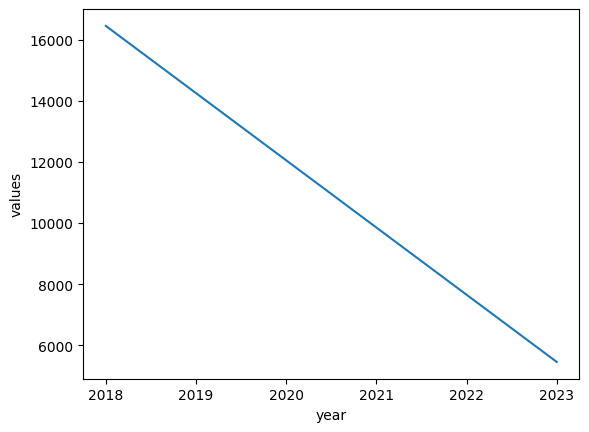

In [ ]:
#Random Graph Generator
import matplotlib.pyplot as plt
import random
i=random.randint(0, 8759)
y_values=[mixed_df['values_2018'].iloc[i],mixed_df['values_2019'].iloc[i],mixed_df['values_2020'].iloc[i],mixed_df['values_2021'].iloc[i],mixed_df['values_2022'].iloc[i],mixed_df['values_2023'].iloc[i]]
x_values=[2018,2019,2020,2021,2022,2023]
plt.plot(x_values,y_values)
plt.xlabel('year')
plt.ylabel('values')
plt.show()